## **Generating example classification data**
------------------------
Generating data from two separate two dimensional normal distributions.  
Any points that come from the first distribution is categorized under class 1  
And any points that come from the second distribution is categorized under class 2  


In [1]:
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
h = 1  # mean of the distribution
sd = 1  # standard deviation
N = 50  # sample size
x1 = ss.norm.rvs(-h,sd,size=N)  # x coordinates for classs 1
y1 = ss.norm.rvs(0,sd,N)   # y coordinates for classs 1
x2 = ss.norm.rvs(h,sd,N)  # x coordinates for classs 2
y2 = ss.norm.rvs(0,sd,N)   # y coordinates for classs 2

In [4]:
def gen_data(N,h,sd1,sd2):
    import scipy.stats as ss
    x1 = ss.norm.rvs(-h,sd1,N)  
    y1 = ss.norm.rvs(0,sd1,N)   
    x2 = ss.norm.rvs(h,sd2,N) 
    y2 = ss.norm.rvs(0,sd2,N)
    return(x1,x2,y1,y2)

In [5]:
(x1,y1,x2,y2) = gen_data(50,1,1,1.5)

In [6]:
(x1,y1,x2,y2) = gen_data(1000,1.5,1,1.5)

In [7]:
def plot_data(x1,y1,x2,y2):
    import matplotlib.pyplot as plt
    plt.figure(figsize=(40,30))
    plt.rcParams["font.size"]=30
    plt.plot(x1,y1, color="#D2340D", linestyle="none", markeredgecolor="black", markersize=15, marker="o", label="Class 1")
    plt.plot(x2,y2, color="#0DD23E", markeredgecolor="black", linestyle="none", markersize=15, marker="o", label="Class 2")
    plt.xlabel("$X_1$")
    plt.ylabel("$X_2$")
    plt.legend(loc="lower left")
    plt.show()

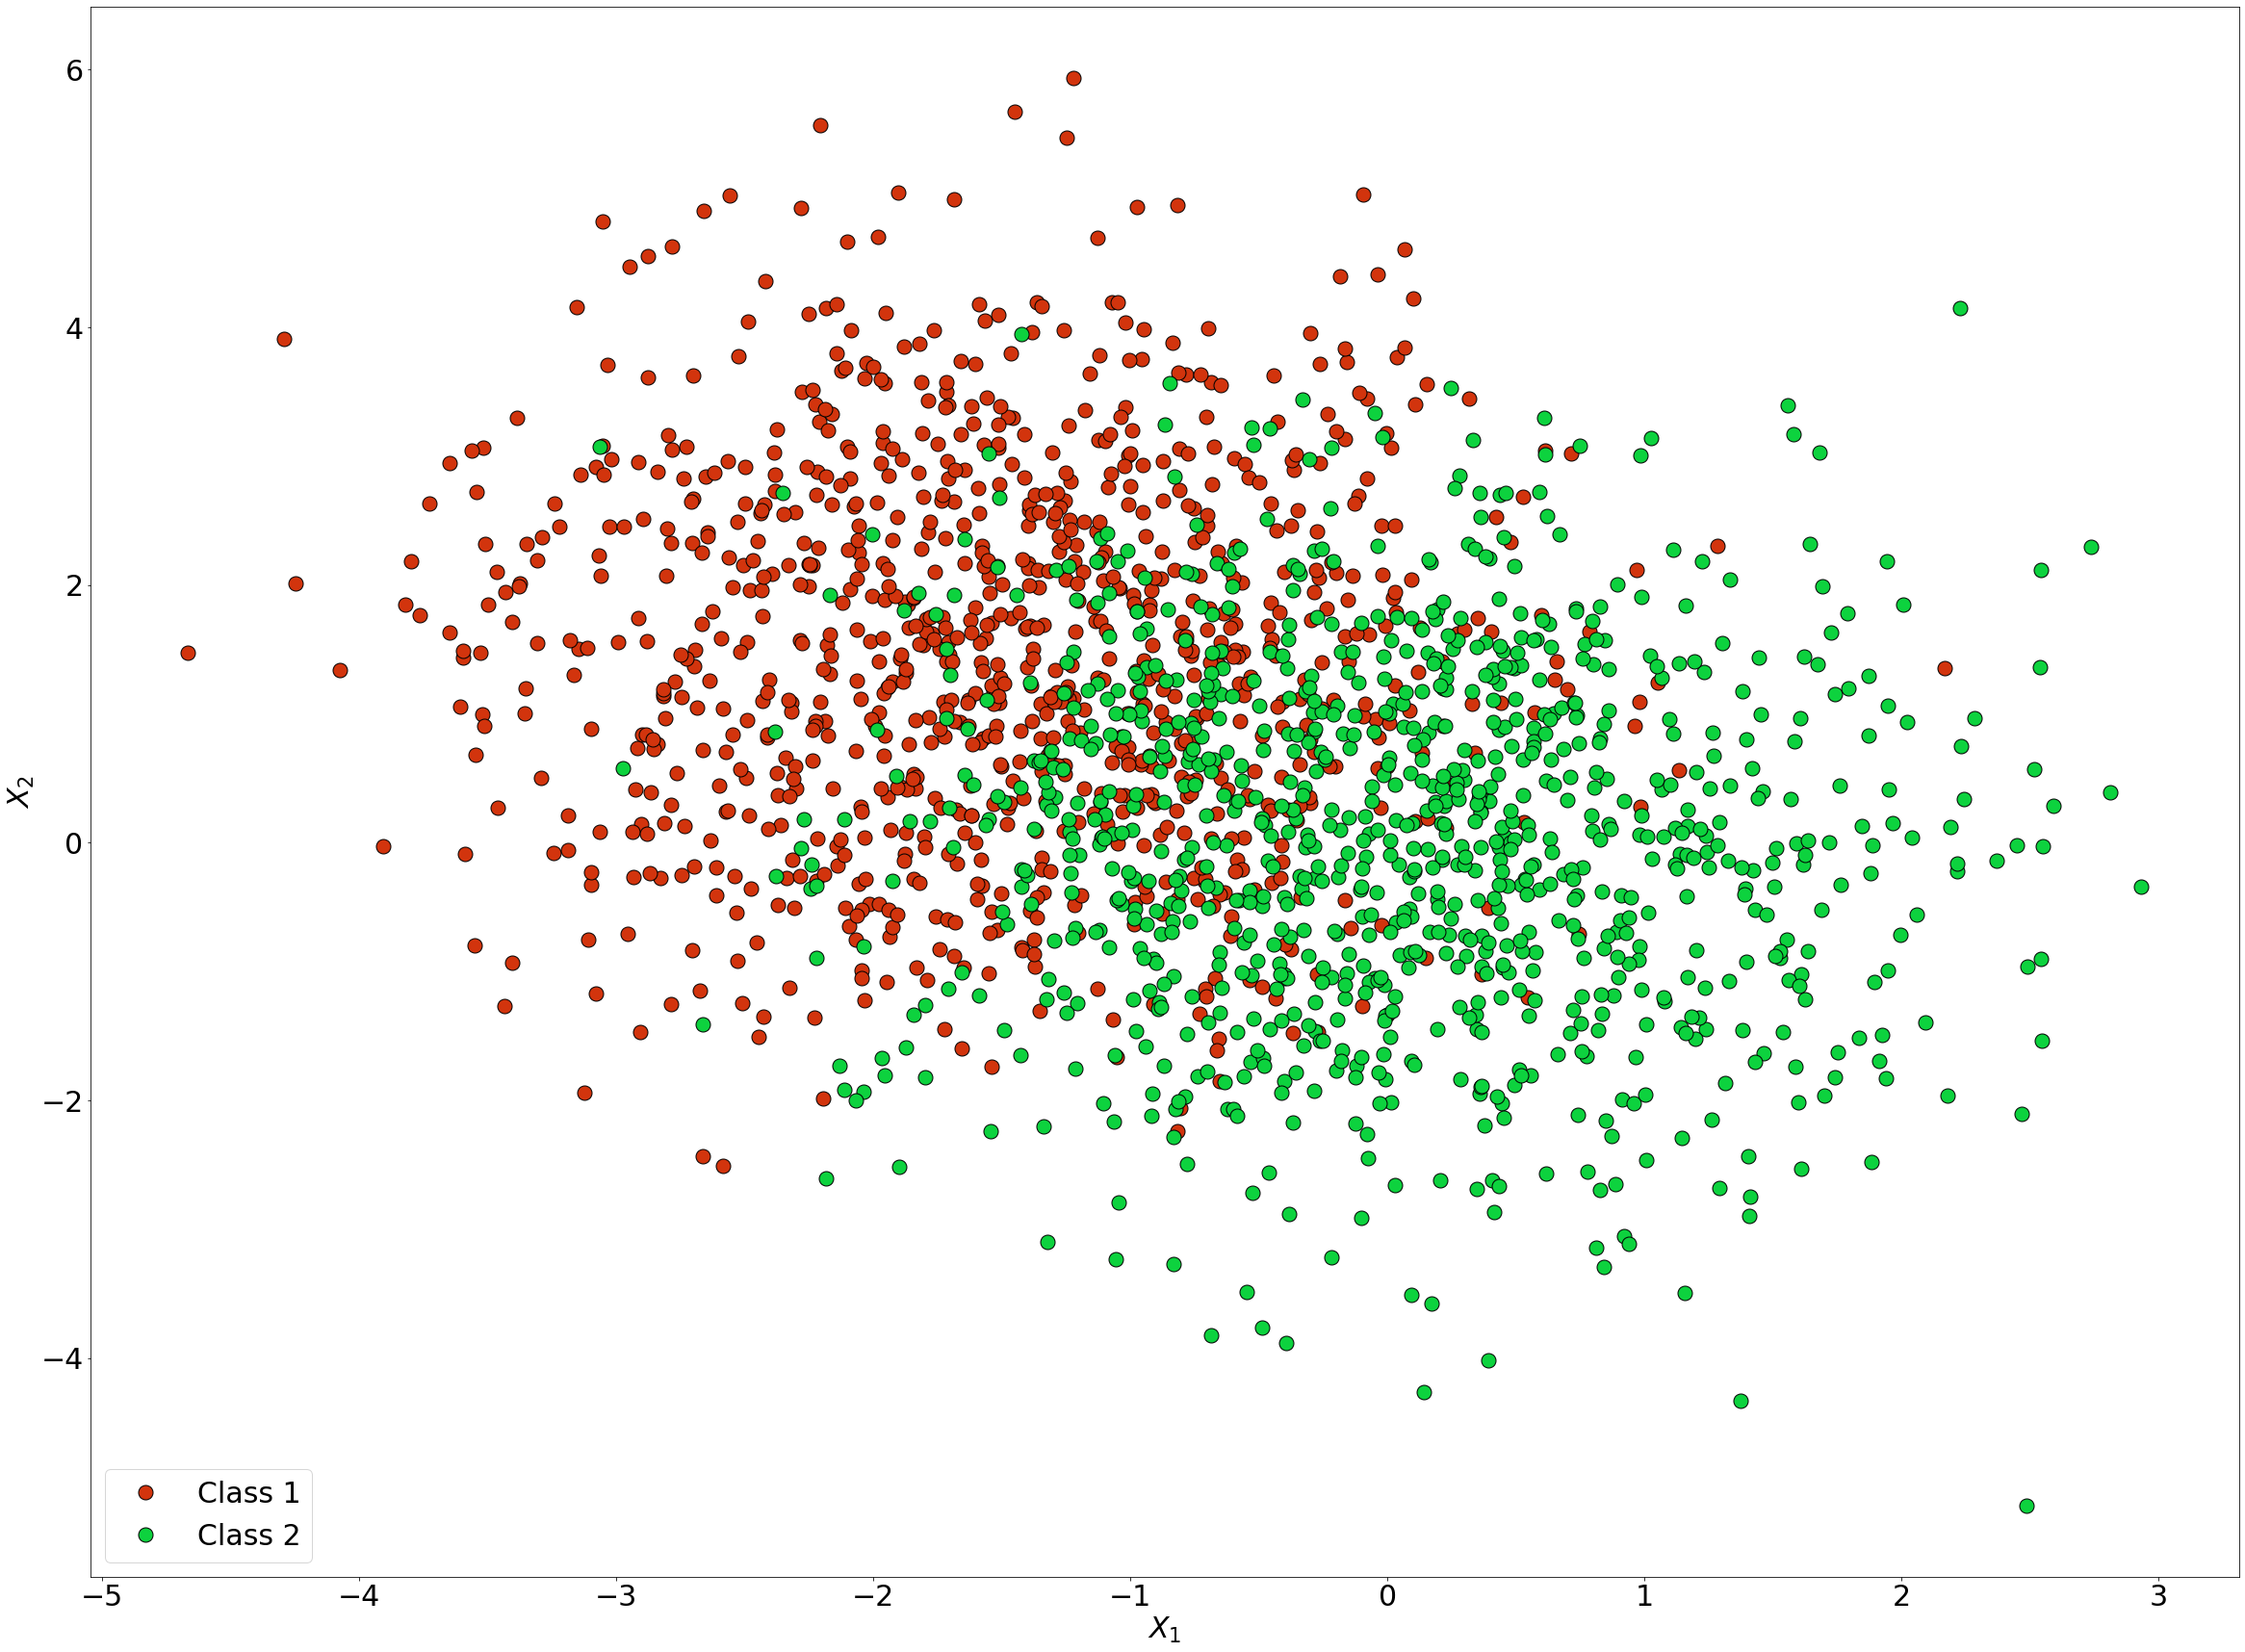

In [8]:
plot_data(x1,y1,x2,y2)

**The group of points on left (red), are from class 1   
And the points from the right (green) are from class 2   
The centres of these clouds of data points are symmetrically located around $X_1$ = 0   
The cloud on the right (green) is broader than the red cloud since we used a larger standard deviation to generate that sample data.**

## **_Classification_**

**There are many different classifiers, to do the classification. The most basic classification technique being the logistic regression. The `regression` in its name holds no true relationships to the function of the classifier.  And this is a binary classifier, meaning that its used in classification settings where the outcomes are of just 2 categories.**  
<br>
**If we have just 2 classes, the outcomes can be categorized as booleans (0s and 1s). The goal is to model the conditional probability that the outcome belongs to a particular class conditional on the values of predictors. These can be called `conditional class probabilities`.**   
<br>
**The probability of X, $P(X) = P(Y=1|X)$   
This is interpreted as the probability of X, given that Y is equal to 1 for the given value of X.**

In linear regression, <font size=6> **$P(X) = \beta_0  +  \beta_1  X_1$** </font>   
In this setting we have a single predictor <font size=6>**$X_1$**</font>   
The most obvious problem here is that the probabilities must always lie between 0 and 1 but there is no way to impose that constrain here.   
So using this we might get probabilities that are lesser than 0 or greater than 1.   
Thus instead of this linear regression <font size=6>$P(X)$</font> we can modify the let hand side of the equation.   
<font size = 5>$log\frac{P(X)}{1 - P(X)} = \beta_0 + \beta_1  X_1$</font>    
The right hand side isn't changed. So this is still a linear model, but rather than directly modeling the the probability $P(X)$ its modeling the expression <font size = 4>$log\frac{P(X)}{1 - P(X)}$</font> here.   
**<font size = 4>$log\frac{P(X)}{1 - P(X)}$</font> is non-linear, thus we can say that logistic regression is a linear model that models probabilities on a non linear scale**

<font size = 4>$log\frac{P(X)}{1 - P(X)}$</font>     
$P(X)$ denotes the probability of an event occurring    
$1 - P(X)$ denotes the probability of that event not occurring    
<font size = 4>$\frac{P(X)}{1 - P(X)}$</font>  gives the proportion betwen the event occurring & not occurring, which is called the odds of the event.   

**Odds are defined as proportions of two probabilities and probabilities are never negative, the odds of an event can take any value between 0 and + infinity. The $log$ of the odds gives the log odds of that particular event. Ans $log(odds)$ can vary from <font size=5>$-\infty$ to  $+\infty$**</font>.  
The function that maps $P(X)$ to $log\frac{P(X)}{1-P(X)}$ is called a $logit$   function.  

This equation can be extended for multiple predictors. Where this is called multiple logistic regression.  
<font size=5> $log\frac{P(X)}{1 - P(X)} = \beta_0 + \beta_1 X_1 + ......+  \beta_n X_n$</font>  
The coefficients $\beta_0, \beta_1 ..... \beta_n$ must be estimated from the data. This is usually done using the method of maximum likelihood. The intuition behind the maximum likelihood method is to find the parameter estimates that make the observed data maximally likely. 

In [9]:
 def prob_to_odds(p):
    if p <= 0 or p >= 1:
        print("Probabilities must be between 0 and 1.")
    return p / (1-p)

Assume that there are only two classes and all data points belong to one of these two classes. The probability that a given data point belongs to Class 1 is 0.2.    
What are the odds that a given data point belongs to Class 2 as given by the function above?

In [10]:
prob_to_odds(.2)

0.25

In [11]:
prob_to_odds(.8)

4.000000000000001

In [12]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()  # instantiating the model object

In <font size=5> $log\frac{P(X)}{1 - P(X)} = \beta_0 + \beta_1 X_1 + ......+  \beta_n X_n$</font>  the left portion of the equation is the X (a matrix of inputs) and the right side of the equation is the Y (a vector of outcomes). We have observations from 2 classes 1 and 2. So Y will have 1s and 2s in an arbitrary sequence. In the X matrix, each row corresponds to different observations and columns correspond to the values of the covariates (predictors). 

Sklearn `LogisticRegression()` function wants two inputs: which are the Xs & Ys. Here Xs mean the inputs (predictors) and the Ys mean the outcomes (predictions).

In [35]:
np.vstack((x1,y2)).shape  # has 2 rows and 1000 columns, not what we want

(2, 1000)

In [36]:
np.vstack((x1,y1)).transpose().shape  # perfect

(1000, 2)

In [54]:
a = np.vstack((x1,y1)).transpose()
a.shape

(1000, 2)

In [52]:
b = np.vstack((x2,y2)).transpose()
b.shape

(1000, 2)

In [50]:
X = np.vstack((a,b))  # the inputs matrix

In [55]:
X.shape  # 1000 observations from each class!!

(2000, 2)

In [59]:
# generating the outcomes vector Y (an arbitrary vector)
Y = np.hstack((np.repeat(1,1000),np.repeat(2,1000)))  # binary outcomes - 1s and 2s
# the outcomes vector Y

In [61]:
len(Y)  # 1 D array

2000

In [63]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.5, random_state=1)

In [64]:
x_train.shape  # 1000 observations randomly selected from X

(1000, 2)

In [65]:
x_test.shape

(1000, 2)

In [68]:
y_train.shape   # 1000 classes randomly selected from vector Y

(1000,)

In [69]:
y_test.shape

(1000,)

In [70]:
classifier.fit(x_train,y_train)   # training the classifier using the training data (inputs - x_train & outputs - y_train)

LogisticRegression()

In [71]:
# to test how well does the classifier perform 
classifier.score(x_test, y_test)

0.803

**In classification context we are modeling conditional probabilities, so we can ask sklearn to give us the estimates of such probabilities.**

In [73]:
classifier.predict_proba(np.array([-2,0]))   # we are asking the probability of a sigle sample

ValueError: Expected 2D array, got 1D array instead:
array=[-2  0].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [75]:
classifier.predict_proba(np.array([-2,0]).reshape(1,-1))    # here are 2 probabilities, because we had two classes
# the first probability means that the given datapoint (-2,0) has .8326 probability to belong to class 1 
# and .167 probability to belong to class 2

array([[0.83261346, 0.16738654]])

In [77]:
classifier.predict(np.array([-2,0]).reshape(1,-1))   # the given datapoint belongs to class 1, therefore the high probability
# for class 1 

array([1])

## _Computing predictive probabilities across the grid_

Computing the probabilities (of belonging to class 1 and class 2) for every intersect in the $x_1,x_2$ grid    
Specify a grid using `np.meshgrid()`, by soecifying a spacing on the $x_1$ axis and specify the same spacers on the $x_2$ axis as well. This will generate a grid from which 2 matrices can be obtained: i.e one matrix containing the $x_1$ coordinates for all intersects and the other matrix containing the $x_2$ coordinates for all intersects.    
<br>
But when calling the `predict_proba()` function, the predictors are passed in as arrays! But here we have matrices not arrays. The `.ravel()` function converts matrices into 1 dimensional arrays (vectors) by stacking each row of the matrix one behind another in a one dimensional array.   
Thus we can obtain 2 arrays from $x_1, x_2$ matrices and stack them side by side to obtain a matrix, which will need to be transposed!.    

In [123]:
# making a function for this:

def plot_probs(ax, classifier, class_id):
    xx1, xx2 = np.meshgrid(np.arange(-5,5,0.1), np.arange(-5,5,0.1))    # specifying the spacers for the meshgrid uding np.arange()
    # assigning the x1 & x2 coordinates of the meshgrid intersects to matrices xx1 & xx2
    probs = classifier.predict_proba((np.stack((xx1.ravel(), xx2.ravel()), axis=1)))   # predicting the probabilities on vectorized coordinate matrices
    # probs contains a pair of probabilities for every single row (observation)
    z = probs[:,class_id]   # extract the column representing the desired class with all rows, in a cariable z 
    z = z.reshape(xx1.shape)  # z is a column! needs to be reshaped in the dimensions of xx1 or xx2 for plotting
    cs = ax.contourf(xx1, xx2, z)   # plotting the values of z, at locations specified by xxx1 & xx2
    cbar = plt.colorbar(cs)   # adding colorbar to the plot
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$")

In [124]:
#  xx1, xx2 = np.meshgrid(np.arange(-5,5,0.1), np.arange(-5,5,0.1))
#  np.vstack((xx1.ravel(),xx2.ravel())).transpose() == np.stack((xx1.ravel(),xx2.ravel()),axis=1)

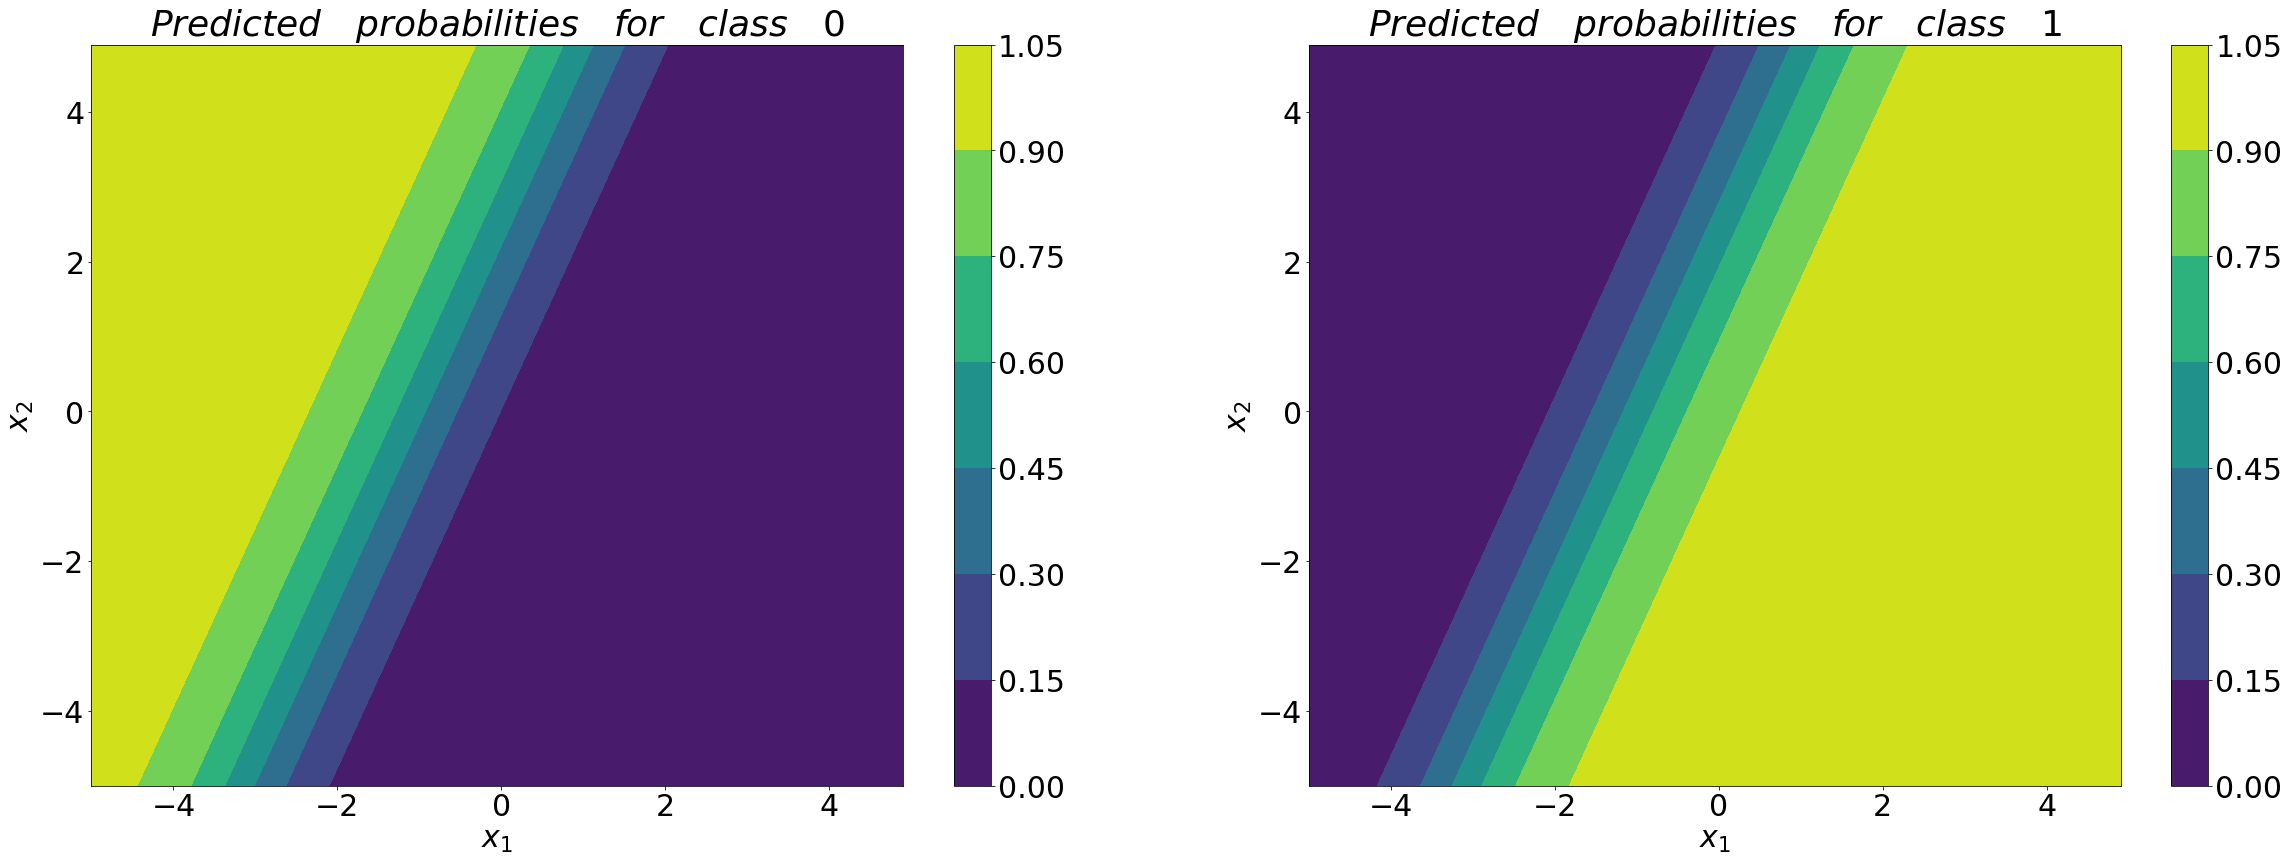

In [132]:
plt.figure(figsize=(40,30))
ax = plt.subplot(221)
plot_probs(ax, classifier, 0)  # for class 0: the first class
plt.title("$Predicted\hspace{1}probabilities\hspace{1}for\hspace{1}class\hspace{1}0$")
ax = plt.subplot(222)
plot_probs(ax, classifier, 1)  # for class 1: the second class
plt.title("$Predicted\hspace{1}probabilities\hspace{1}for\hspace{1}class\hspace{1}1$")
plt.show()

In the left plot:  
On the x axis we have the values of $x_1$ predictor and on y axis we have different values of $x_2$ predictor.    
The contents of the plot corresponds to probabilities, which varies from 0 to 1.   
Yellow coloration means that the particular grid point has the highest likelihood to belong to that class!
e.g: (-4,4) will most likely belong to class 0.
As one moves diagonally right the conditional probability declines smoothly. e.g: (4,-4) will most likely belong to class 2, since it is blue in color in the left plot!!   
In the right plot:
It is essentially a superimposable compliment of the plot 1!   
The regions yellow was present in the plot 1 is replaced by blue in plot 2 and vice versa.  
In other words the probabilities of a single grid point in both plots should add up to 1.